In [4]:
# Instalação das bibliotecas necessárias


In [5]:

# Importação de todas as ferramentas
from google.colab import drive
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import time


# Bibliotecas de Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier


In [6]:
#Carregamento do DataFrame
drive.mount('/content/drive')
ARQUIVO_DADOS = "/content/drive/MyDrive/RESULTADOPESQUISA - Dados sensiveis retirados - RESULTADOPESQUISA (1).csv"
df = pd.read_csv(ARQUIVO_DADOS)
print(f"Tamanho da base de dados linhas {df.shape}/colunas")

Mounted at /content/drive
Tamanho da base de dados linhas (1460, 17)/colunas


# Primeiras 5 linhas

In [7]:
df.head()

,Idade,Grau de escolaridade,Estado civil,"Estado onde mora atualmente ( SIGLA ) Exemplo PR, GO, SC",Você trabalha atualmente?,Qual é sua faixa salarial mensal?,"Qual é a sua principal queixa hoje em relação à sua pele, cabelo ou aparência? Exemplo: acne, manchas, ressecamento, oleosidade, queda de cabelo, estrias, cicatrizes (Selecione todas as opções que se aplicam)",Há quanto tempo isso te incomoda?,Como você classificaria o impacto disso na sua autoestima?,Você já usa algum produto de beleza?,Quais produtos de beleza você usa atualmente? (Selecione todas as opções que se aplicam),Quais cuidados de beleza você faz hoje? (Selecione todas as opções que se aplicam),"Se você pudesse comprar uma solução que resolvesse seu problema estético, você compraria?",Até quanto você estaria disposto(a) a pagar para resolver esse problema?,"Se faz faculdade ou especialização qual curso ? Se a reposta for NÃO, digite apenas NÃO",Você faz faculdade ou especialização atualmente?,Já fez algum tratamento profissional para resolver essa queixa?
0,46,Ensino Médio completo,Divorciado,BA,Sim,4.000 – 5.000,Ressecamento; Manchas; Queda de cabelo; Acne,1 mês,Alto,Sim,Hidratante; Protetor solar; Sérum,Atividade física; Dieta; Skincare,SIM,R$101 – R$200,Não,Sim,Não
1,32,Ensino Superior completo,Divorciado,SP,Sim,5.000 – 7.000,Ressecamento; Queda de cabelo; Manchas,1 ano,Alto,Não,Sérum; Protetor solar; Hidratante,Dieta; Atividade física; Skincare,SIM,R$301 – R$500,Não,Não,Não
2,25,Ensino Superior completo,Divorciado,RJ,Sim,4.000 – 5.000,Queda de cabelo; Acne,2 anos,Médio,Sim,Sérum; Protetor solar,Atividade física; Skincare,SIM,R$301 – R$500,Não,Não,Não
3,38,Ensino Fundamental completo,Casado,SC,Sim,Acima de 7.000,Manchas; Oleosidade; Queda de cabelo; Ressecam...,1 mês,Baixo,Sim,Sérum; Protetor solar; Hidratante,Atividade física; Skincare; Dieta,SIM,R$301 – R$500,Não,Sim,Não
4,36,Ensino Superior completo,Solteiro,GO,Sim,5.000 – 7.000,Acne; Queda de cabelo; Oleosidade,2 anos,Alto,Sim,Sérum; Hidratante; Protetor solar,Skincare; Atividade física; Dieta,SIM,R$301 – R$500,Não,Não,Não


# Ultimas 5 linhas

In [8]:
df.tail()

,Idade,Grau de escolaridade,Estado civil,"Estado onde mora atualmente ( SIGLA ) Exemplo PR, GO, SC",Você trabalha atualmente?,Qual é sua faixa salarial mensal?,"Qual é a sua principal queixa hoje em relação à sua pele, cabelo ou aparência? Exemplo: acne, manchas, ressecamento, oleosidade, queda de cabelo, estrias, cicatrizes (Selecione todas as opções que se aplicam)",Há quanto tempo isso te incomoda?,Como você classificaria o impacto disso na sua autoestima?,Você já usa algum produto de beleza?,Quais produtos de beleza você usa atualmente? (Selecione todas as opções que se aplicam),Quais cuidados de beleza você faz hoje? (Selecione todas as opções que se aplicam),"Se você pudesse comprar uma solução que resolvesse seu problema estético, você compraria?",Até quanto você estaria disposto(a) a pagar para resolver esse problema?,"Se faz faculdade ou especialização qual curso ? Se a reposta for NÃO, digite apenas NÃO",Você faz faculdade ou especialização atualmente?,Já fez algum tratamento profissional para resolver essa queixa?
1455,25,Ensino Fundamental completo,União Estável,SC,Sim,5.000 – 7.000,Manchas; Oleosidade; Queda de cabelo,1 mês,Alto,Sim,Hidratante; Protetor solar; Sérum,Skincare; Atividade física; Dieta,SIM,R$101 – R$200,Não,Não,Sim
1456,28,Ensino Médio completo,Casado,SP,Sim,5.000 – 7.000,Queda de cabelo; Oleosidade; Acne,1 mês,Médio,Sim,Sérum; Protetor solar; Hidratante,Atividade física; Dieta; Skincare,SIM,R$201 – R$300,Direito,Não,Não
1457,30,Mestrado,Casado,DF,Não,5.000 – 7.000,Oleosidade; Acne; Manchas; Ressecamento; Queda...,6 meses,Alto,Sim,Hidratante; Protetor solar; Sérum,Atividade física; Skincare; Dieta,SIM,R$301 – R$500,Engenharia,Sim,Não
1458,34,Ensino Superior completo,Solteiro,PR,Sim,3.000 – 4.000,Oleosidade; Manchas; Acne,3 meses,Alto,Sim,Hidratante; Protetor solar; Sérum,Atividade física; Dieta; Skincare,SIM,R$301 – R$500,Medicina,Sim,Sim
1459,25,Ensino Médio completo,Divorciado,RJ,Sim,2.000 – 3.000,Queda de cabelo; Acne; Ressecamento; Oleosidad...,2 anos,Baixo,Sim,Sérum; Protetor solar; Hidratante,Dieta; Atividade física; Skincare,SIM,R$301 – R$500,Medicina,Não,Não


# Diagnóstico inicial

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column                                                                                                                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                            --------------  ----- 
 0   Idade                                                                                                                                                                                                             1460 non-null   int64 
 1   Grau de escolaridade                                                                                                                                                          

# Verificar distribuição

In [10]:
df.describe(include='all')


,Idade,Grau de escolaridade,Estado civil,"Estado onde mora atualmente ( SIGLA ) Exemplo PR, GO, SC",Você trabalha atualmente?,Qual é sua faixa salarial mensal?,"Qual é a sua principal queixa hoje em relação à sua pele, cabelo ou aparência? Exemplo: acne, manchas, ressecamento, oleosidade, queda de cabelo, estrias, cicatrizes (Selecione todas as opções que se aplicam)",Há quanto tempo isso te incomoda?,Como você classificaria o impacto disso na sua autoestima?,Você já usa algum produto de beleza?,Quais produtos de beleza você usa atualmente? (Selecione todas as opções que se aplicam),Quais cuidados de beleza você faz hoje? (Selecione todas as opções que se aplicam),"Se você pudesse comprar uma solução que resolvesse seu problema estético, você compraria?",Até quanto você estaria disposto(a) a pagar para resolver esse problema?,"Se faz faculdade ou especialização qual curso ? Se a reposta for NÃO, digite apenas NÃO",Você faz faculdade ou especialização atualmente?,Já fez algum tratamento profissional para resolver essa queixa?
count,1460.000000,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,NaN,7,4,8,2,6,306,5,3,2,15,15,2,4,4,2,2
top,NaN,Ensino Superior completo,Solteiro,SC,Sim,5.000 – 7.000,Queda de cabelo,2 anos,Médio,Sim,Hidratante; Protetor solar; Sérum,Dieta; Atividade física; Skincare,SIM,R$301 – R$500,Não,Sim,Sim
freq,NaN,512,414,206,1100,483,65,322,580,896,157,182,876,660,582,737,742
mean,36.581507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,10.859224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,46.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Mapeamento e Renomeação de Colunas

In [11]:

col_mapping = {
    'Email': 'email', 'Nome completo': 'nome', 'Idade': 'idade', 'Grau de escolaridade': 'escolaridade',
    'Você faz faculdade ou especialização atualmente?': 'faz_faculdade',
    'Se faz faculdade ou especialização qual curso ? Se a reposta for NÃO, digite apenas NÃO': 'curso_faculdade',
    'Estado civil': 'estado_civil',
    'Estado onde mora atualmente ( SIGLA ) Exemplo PR, GO, SC': 'estado',
    'Cidade onde mora atualmente': 'cidade', 'Você trabalha atualmente?': 'trabalha',
    'Cargo ou área de atuação atual ( Se estiver desempregado escreva NÃO )': 'cargo',
    'Qual é sua faixa salarial mensal?': 'faixa_salarial',
    'Área em que gostaria de trabalhar no futuro ( Se pudesse mudar de carreira ou cargo desejado)': 'area_futura',
    'Uma qualidade sua': 'qualidade_sua', 'Um defeito seu': 'defeito_sua',
    'Qual é a sua principal queixa hoje em relação à sua pele, cabelo ou aparência? Exemplo: acne, manchas, ressecamento, oleosidade, queda de cabelo, estrias, cicatrizes (Selecione todas as opções que se aplicam)': 'queixa',
    'Há quanto tempo isso te incomoda?': 'tempo_incomodo',
    'Como você classificaria o impacto disso na sua autoestima?': 'impacto_autoestima',
    'Você já usa algum produto de beleza?': 'usa_produto',
    'Quais produtos de beleza você usa atualmente? (Selecione todas as opções que se aplicam)': 'produtos_atuais',
    'Quais cuidados de beleza você faz hoje? (Selecione todas as opções que se aplicam)': 'cuidados_atuais',
    'Já fez algum tratamento profissional para resolver essa queixa?': 'tratamento_previo',
    'Se você pudesse comprar uma solução que resolvesse seu problema estético, você compraria?': 'compraria_solucao',
    'Até quanto você estaria disposto(a) a pagar para resolver esse problema?': 'disposto_pagar',
    'O que você mais gostaria de fazer hoje? Exemplo: viajar, se reunir com amigos ou família, passear com os pets, tomar um sorvete.': 'hobby',
    'Você possui Pets ? Se SIM, qual ?': 'pets',
    'Qual é a sua meta pessoal ou profissional para os próximos meses ou próximo ano?': 'meta'
}
df = df.rename(columns=col_mapping)



# Remoção de Colunas Irrelevantes

In [12]:
colunas_remover = [
    'email', 'nome', 'curso_faculdade', 'cidade', 'cargo', 'area_futura',
    'qualidade_sua', 'defeito_sua', 'hobby', 'pets', 'meta'
]
df = df.drop(columns=colunas_remover, errors='ignore')
print("Colunas iniciais removidas e renomeadas.")

Colunas iniciais removidas e renomeadas.


In [13]:
df.head()

,idade,escolaridade,estado_civil,estado,trabalha,faixa_salarial,queixa,tempo_incomodo,impacto_autoestima,usa_produto,produtos_atuais,cuidados_atuais,compraria_solucao,disposto_pagar,faz_faculdade,tratamento_previo
0,46,Ensino Médio completo,Divorciado,BA,Sim,4.000 – 5.000,Ressecamento; Manchas; Queda de cabelo; Acne,1 mês,Alto,Sim,Hidratante; Protetor solar; Sérum,Atividade física; Dieta; Skincare,SIM,R$101 – R$200,Sim,Não
1,32,Ensino Superior completo,Divorciado,SP,Sim,5.000 – 7.000,Ressecamento; Queda de cabelo; Manchas,1 ano,Alto,Não,Sérum; Protetor solar; Hidratante,Dieta; Atividade física; Skincare,SIM,R$301 – R$500,Não,Não
2,25,Ensino Superior completo,Divorciado,RJ,Sim,4.000 – 5.000,Queda de cabelo; Acne,2 anos,Médio,Sim,Sérum; Protetor solar,Atividade física; Skincare,SIM,R$301 – R$500,Não,Não
3,38,Ensino Fundamental completo,Casado,SC,Sim,Acima de 7.000,Manchas; Oleosidade; Queda de cabelo; Ressecam...,1 mês,Baixo,Sim,Sérum; Protetor solar; Hidratante,Atividade física; Skincare; Dieta,SIM,R$301 – R$500,Sim,Não
4,36,Ensino Superior completo,Solteiro,GO,Sim,5.000 – 7.000,Acne; Queda de cabelo; Oleosidade,2 anos,Alto,Sim,Sérum; Hidratante; Protetor solar,Skincare; Atividade física; Dieta,SIM,R$301 – R$500,Não,Não


# Funções Auxiliares para Limpeza de Dados

In [14]:


def salario_para_ponto_medio(texto):
    """Converte faixas salariais para o ponto médio numérico."""
    if pd.isna(texto): return 1000
    texto = texto.upper().replace('.', '').replace('R$', '').strip()
    if 'ATÉ' in texto: return 1000
    if 'ACIMA' in texto: return 8000
    valores = [float(v.strip()) for v in re.findall(r'(\d+\.?\d*)', texto)]
    return np.mean(valores) if valores else 1000

def preco_para_ponto_medio(texto):
    """Converte faixas de preço para o ponto médio numérico."""
    if pd.isna(texto): return 100
    texto = texto.upper().replace('R$', '').replace('.', '').replace(',', '.')
    if 'ATÉ' in texto: return float(re.findall(r'\d+', texto)[0]) if re.findall(r'\d+', texto) else 100
    if 'ACIMA' in texto: return 500
    valores = [float(v.strip()) for v in re.findall(r'(\d+\.?\d*)', texto)]
    return np.mean(valores) if valores else 100

def tempo_para_meses(texto):
    """Converte unidades de tempo para meses."""
    if pd.isna(texto): return 6
    texto = str(texto).lower()
    if 'ano' in texto:
        match = re.search(r'(\d+)', texto)
        if match: return float(match.group(1)) * 12
    if 'mes' in texto:
        match = re.search(r'(\d+)', texto)
        if match: return float(match.group(1))
    return 6

# Aplicação dos Tratamentos

In [15]:
# Variável Alvo (Target) - Codificação Binária
df['compraria_solucao'] = df['compraria_solucao'].astype(str).str.strip().str.upper()
df['compraria_solucao'] = df['compraria_solucao'].apply(
    lambda x: 1 if x in ['SIM', 'S', 'COMPRARIA', 'CERTAMENTE', 'COM CERTEZA', 'COMPRARIA.'] else 0
)

# Mapeamento Ordinal (Conversão de categorias com ordem para números)
impacto_map = {'Baixo': 1, 'Médio': 2, 'Alto': 3, 'Muito Baixo': 1, 'Muito Alto': 3, 'Pouco': 1}
df['impacto_autoestima_num'] = df['impacto_autoestima'].map(impacto_map).fillna(1)
df = df.drop(columns=['impacto_autoestima'])

escolaridade_map = {
    'Ensino Fundamental incompleto': 1, 'Ensino Fundamental completo': 2,
    'Ensino Médio incompleto': 3, 'Ensino Médio completo': 4,
    'Ensino Superior incompleto': 5, 'Ensino Superior completo': 6,
    'Pós-graduação': 7, 'Mestrado': 8, 'Doutorado': 9, 'Outro': 4
}
df['escolaridade_num'] = df['escolaridade'].map(escolaridade_map).fillna(4)
df = df.drop(columns=['escolaridade'])

# Conversão Numérica (Ponto Médio e Meses)
df['salario_ponto_medio'] = df['faixa_salarial'].apply(salario_para_ponto_medio)
df = df.drop(columns=['faixa_salarial'])

df['preco_disposto_num'] = df['disposto_pagar'].apply(preco_para_ponto_medio)
df = df.drop(columns=['disposto_pagar'])

df['tempo_incomodo_meses'] = df['tempo_incomodo'].apply(tempo_para_meses)
df = df.drop(columns=['tempo_incomodo'])

# Idade (Imputação da Mediana)
df['idade'] = pd.to_numeric(df['idade'], errors='coerce')
df['idade'] = df['idade'].fillna(df['idade'].median())

print("Variáveis numéricas e ordinais tratadas e convertidas.")

Variáveis numéricas e ordinais tratadas e convertidas.


#  One-Hot Encoding

In [16]:
def multiselect_ohe_and_count(df, col_name, sep=';'):
    """Aplica One-Hot Encoding para multisseleção e cria uma feature de contagem."""
    s = df[col_name].fillna('')

    # Criação de One-Hot Encoding (OHE)
    dummies = s.str.split(sep, expand=True).stack().str.strip().str.upper().str.replace(' ', '_').replace('', np.nan).dropna()
    dummies = pd.get_dummies(dummies)
    # Agrupa por índice original (row) e soma (clip(upper=1) garante que seja binário)
    colunas_novas = dummies.groupby(level=0).sum().clip(upper=1)

    # Criação da Feature de Contagem
    df[f'contagem_{col_name}'] = s.apply(lambda x: len([i for i in x.split(sep) if i.strip()]) if x else 0)

    # Renomeia e concatena OHE
    colunas_novas.columns = [f'{col_name}_{c}' for c in colunas_novas.columns]
    df = pd.concat([df, colunas_novas], axis=1)
    df = df.drop(columns=[col_name])
    return df

# Aplicação da função nas colunas de multisseleção
df = multiselect_ohe_and_count(df, 'queixa', sep=';')
df = multiselect_ohe_and_count(df, 'produtos_atuais', sep=';')
df = multiselect_ohe_and_count(df, 'cuidados_atuais', sep=';')

# Criação de Features de Interação (Sinais Fortes)
df['interacao_pagar_impacto'] = df['preco_disposto_num'] * df['impacto_autoestima_num']
df['interacao_engajamento_cronico'] = df['contagem_cuidados_atuais'] * df['tempo_incomodo_meses']
df['interacao_risco_renda'] = df['contagem_queixa'] * df['salario_ponto_medio']

print("Multisseleção, Contagens e Interações criadas.")

Multisseleção, Contagens e Interações criadas.


# Transformar colunas em binário

In [17]:
#  Codificação Binária (Sim/Não)
for col in ['faz_faculdade', 'trabalha', 'usa_produto', 'tratamento_previo']:
    # Cria a coluna binária e remove a original
    df[col] = df[col].astype(str).str.strip().str.upper()
    df[col + '_bin'] = df[col].apply(lambda x: 1 if x in ['S', 'SIM'] else 0)
    df = df.drop(columns=[col], errors='ignore')

#  One-Hot Encoding (Nominais restantes)
colunas_nominais = ['estado_civil', 'estado']
df = pd.get_dummies(df, columns=colunas_nominais, drop_first=True)

#  Limpeza Final (Trata quaisquer NaNs remanescentes com 0)
df = df.fillna(0)

print(f"Codificação final (OHE) aplicada. Total de features: {len(df.columns)}")

#  Separação de X (features) e y (target)
y = df['compraria_solucao']
X = df.drop(columns=['compraria_solucao'])

Codificação final (OHE) aplicada. Total de features: 38


# Plotagem dos graficos baseado na target(compraria_solucao)

Gerando Count Plots para colunas numéricas (em 4 faixas) vs. Intenção de Compra...


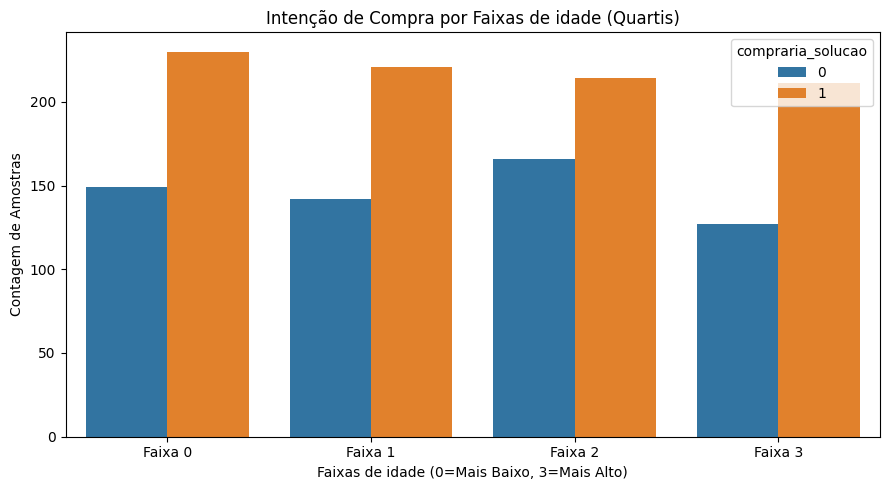

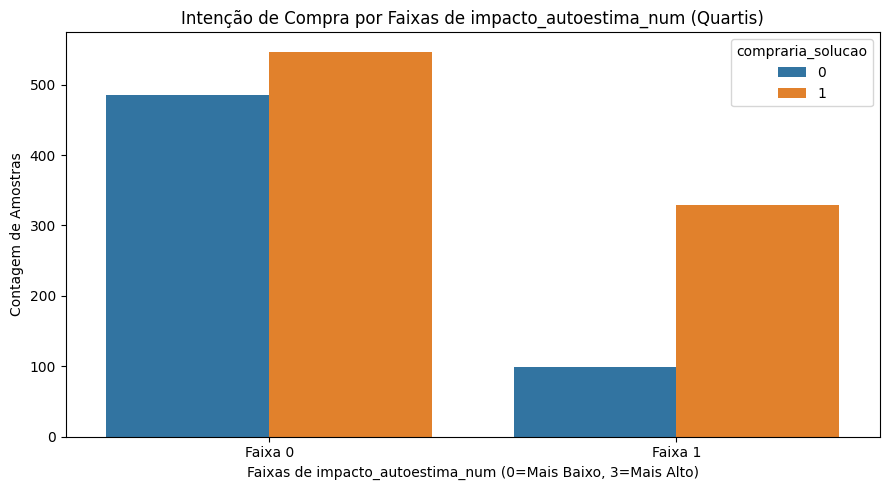

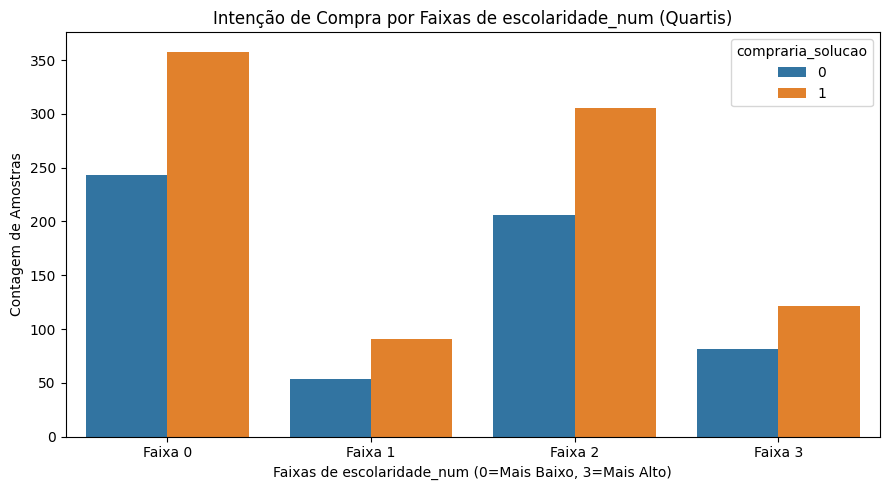

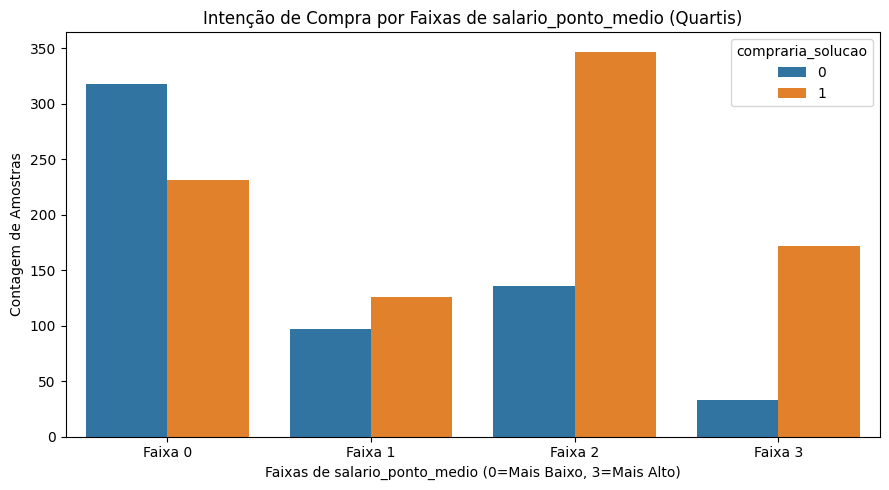

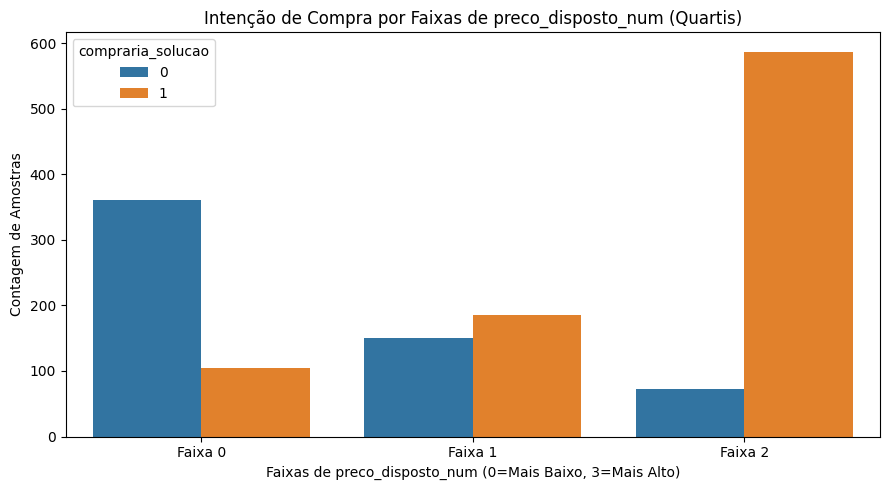

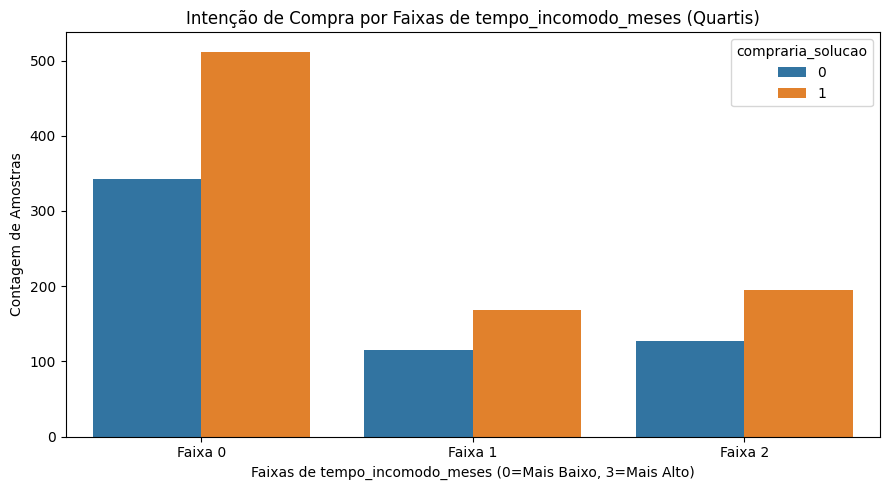

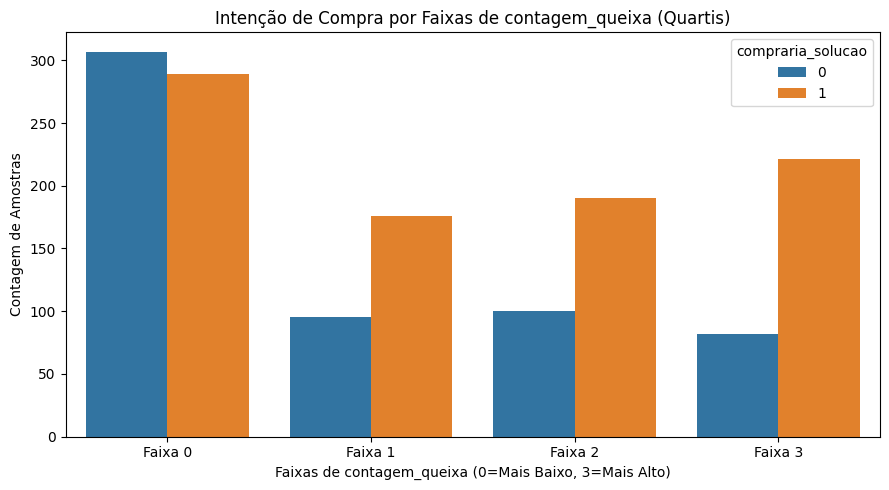

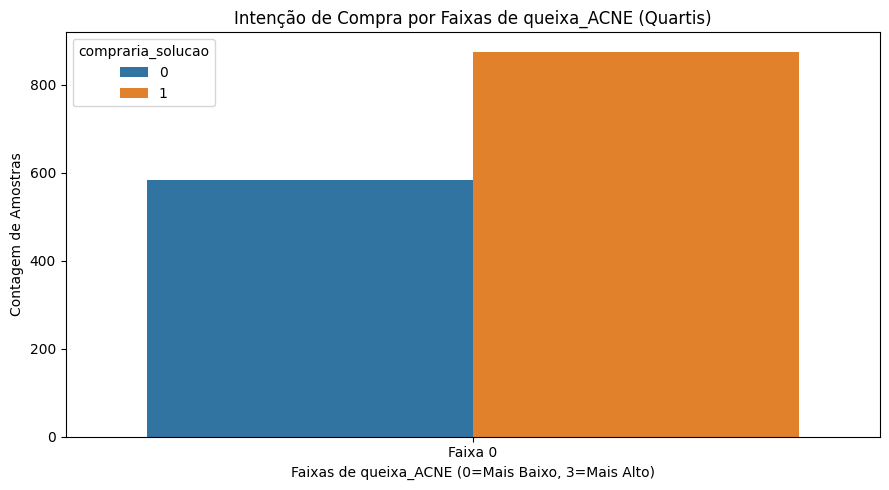

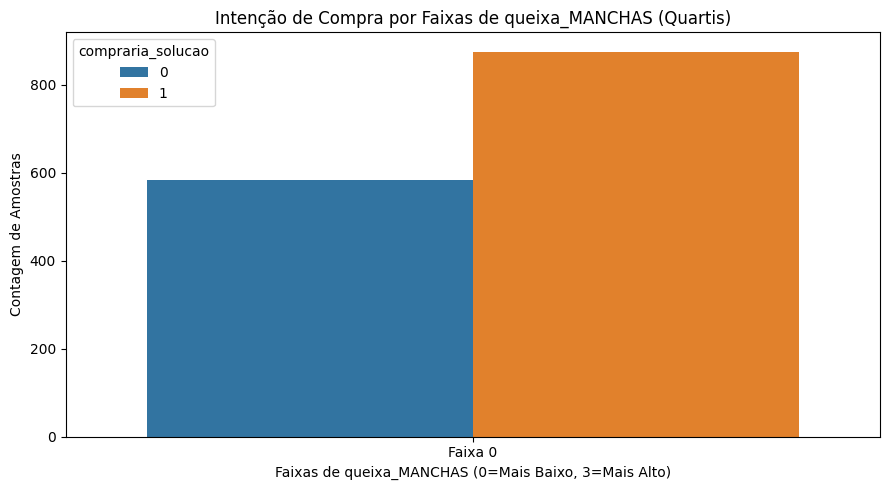

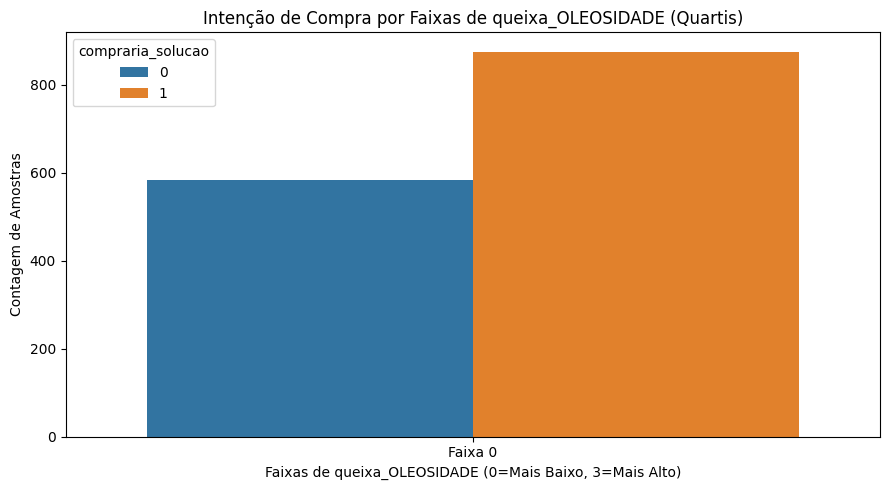

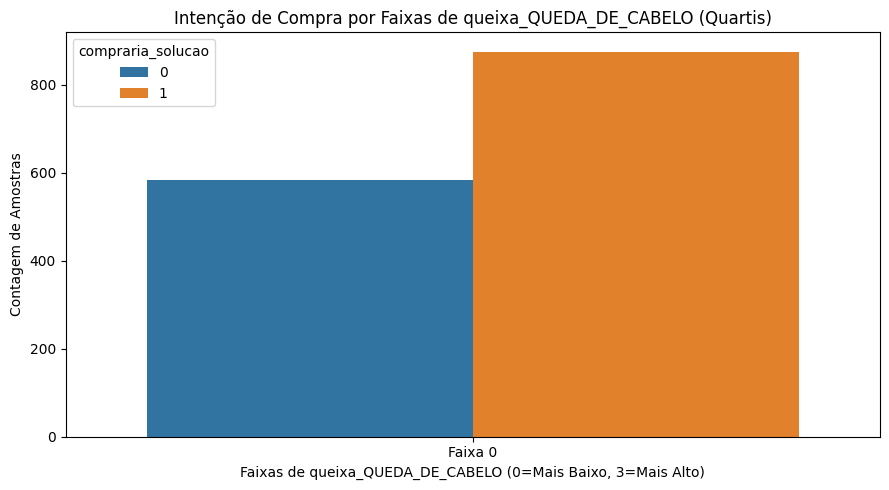

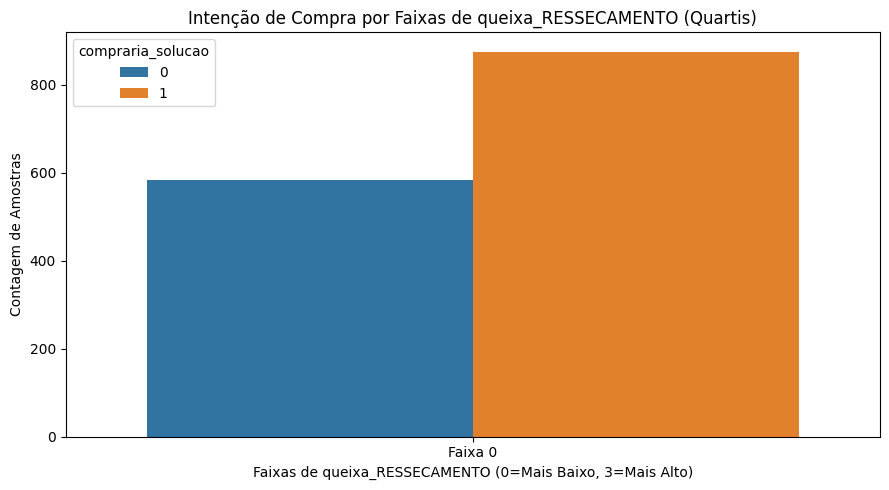

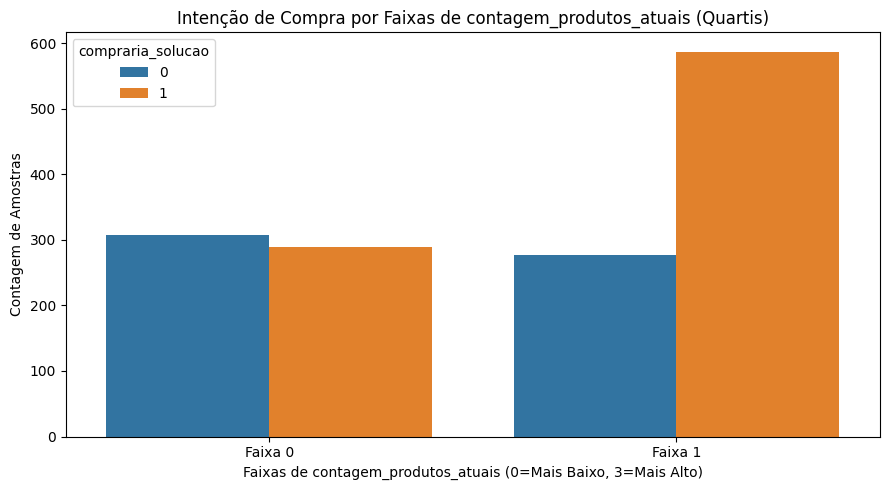

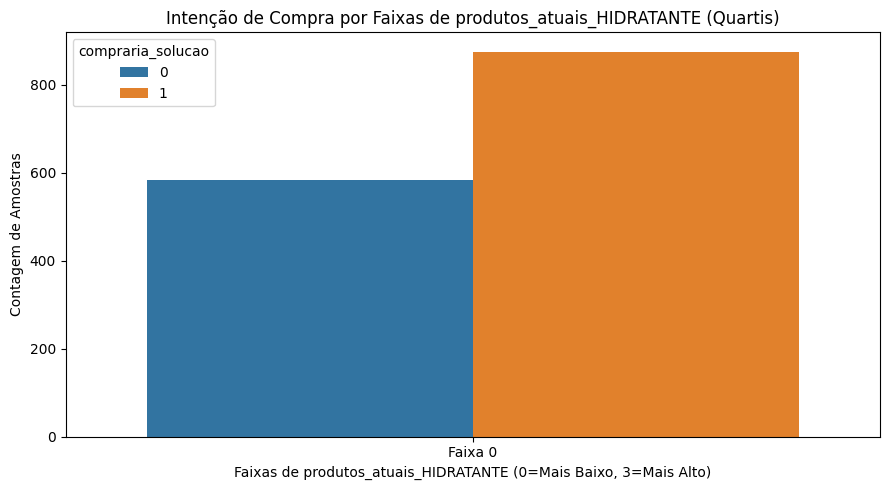

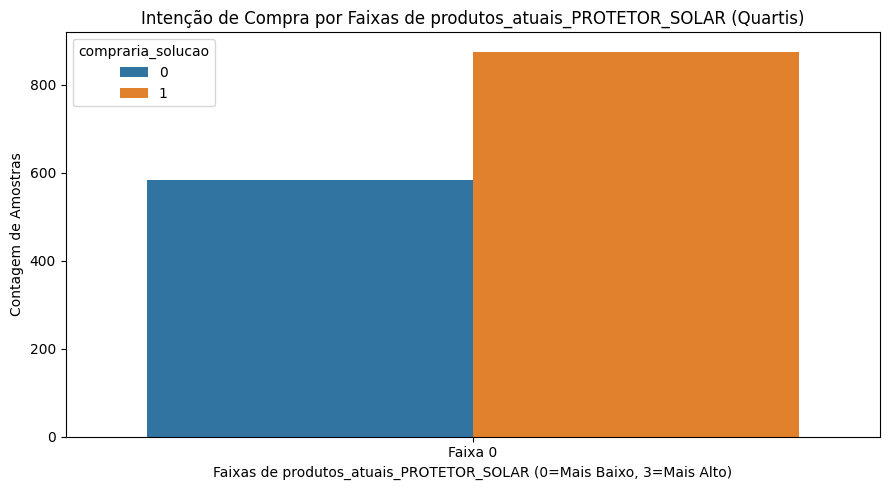

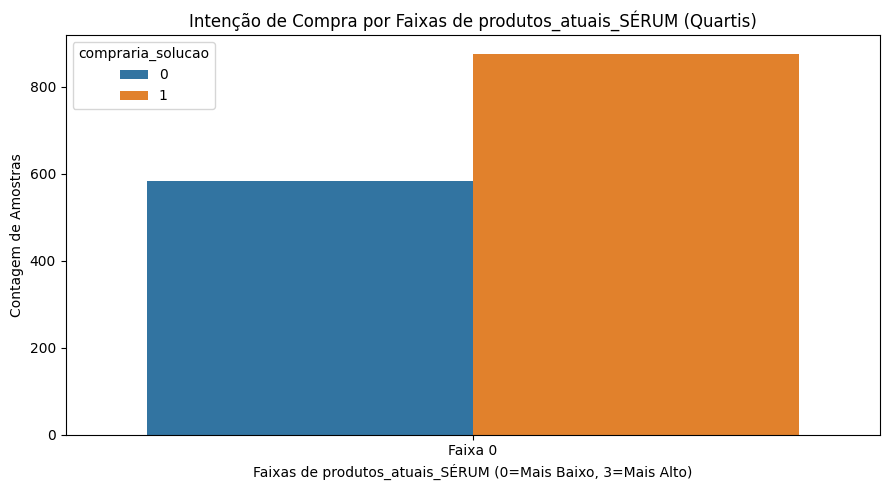

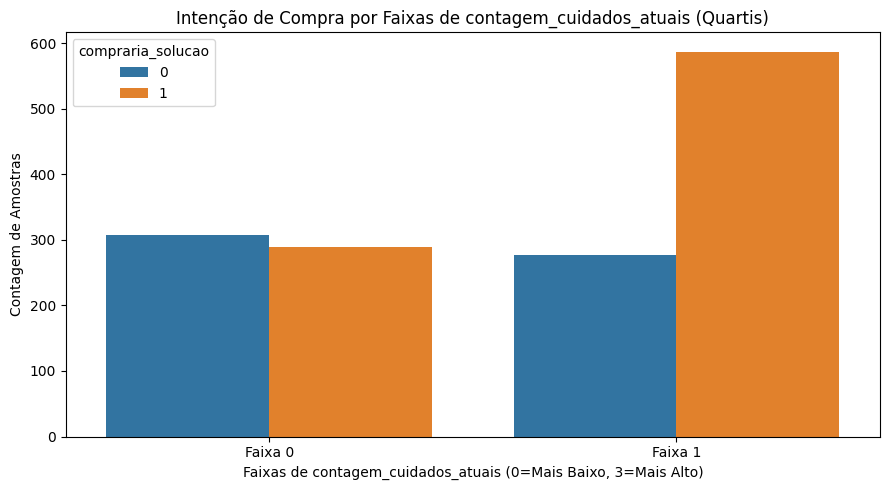

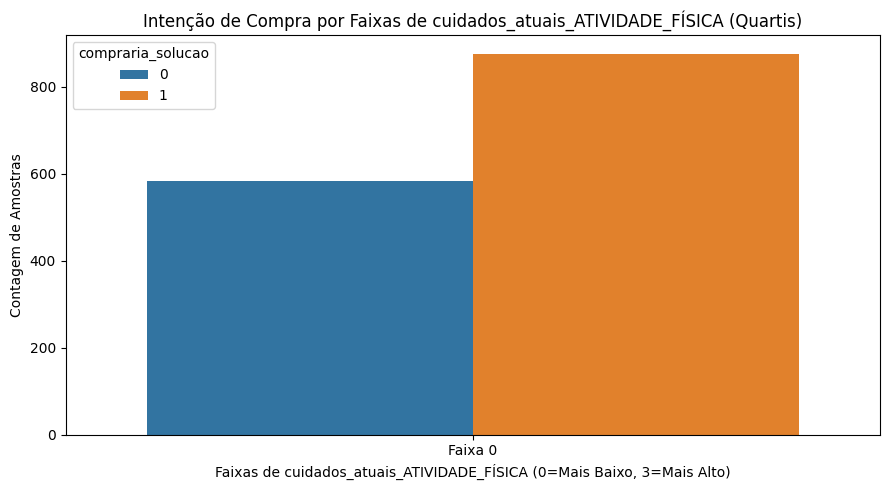

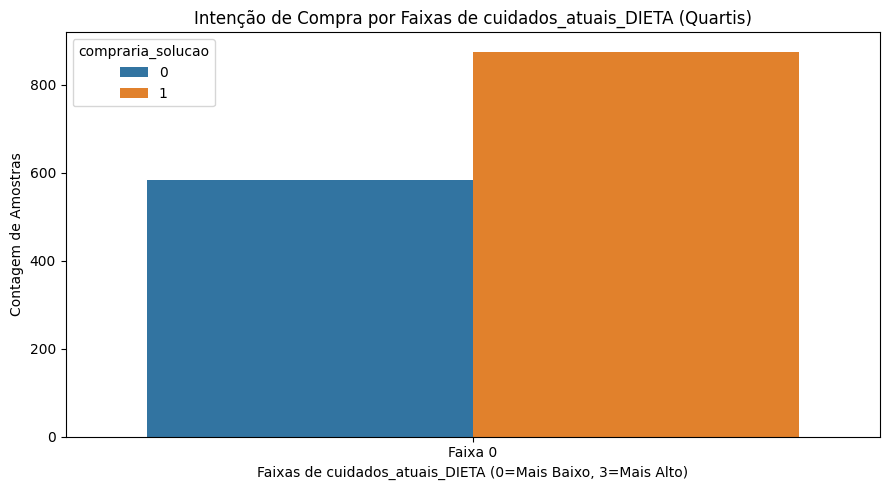

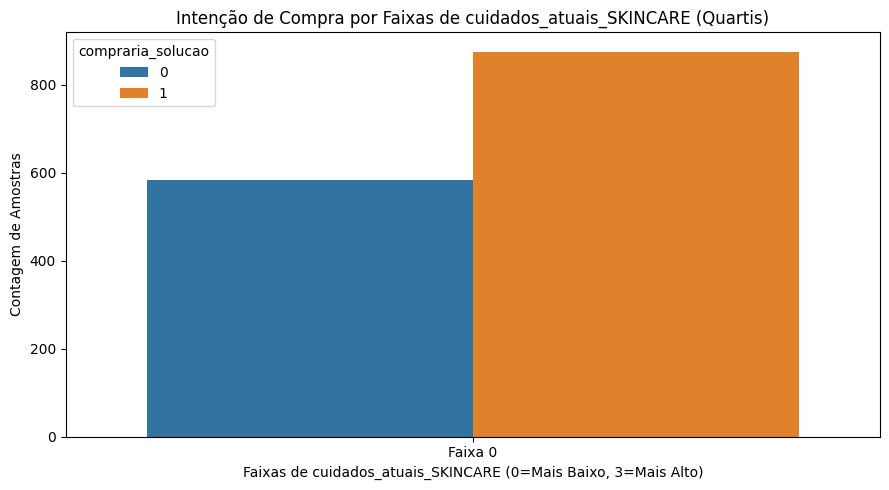

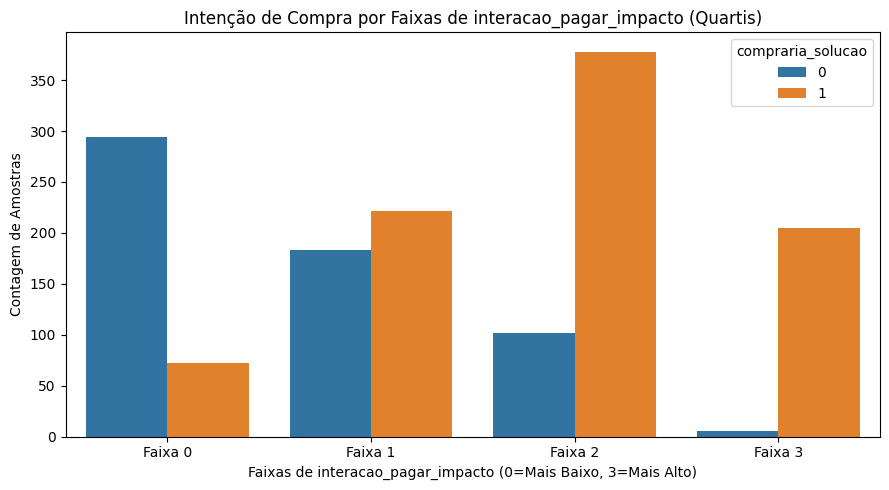

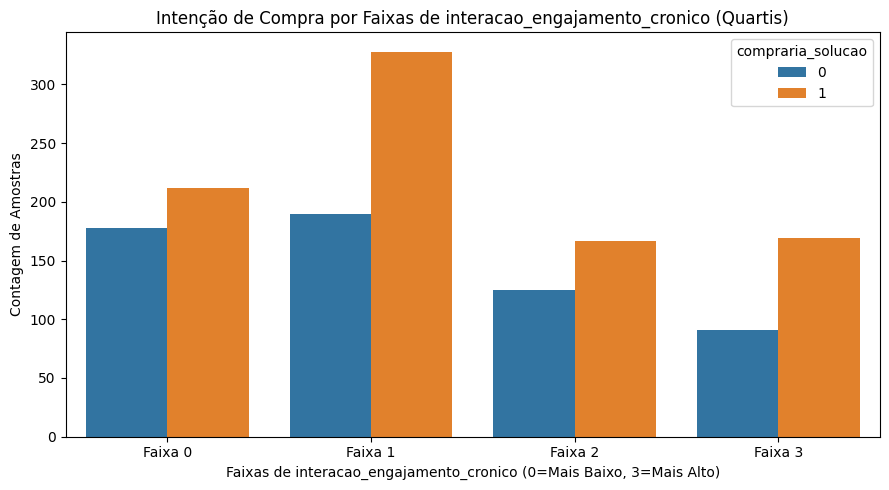

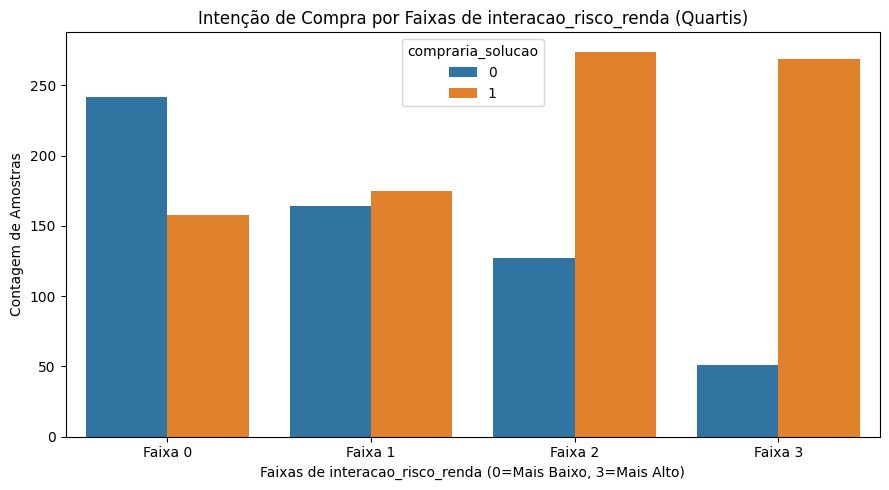

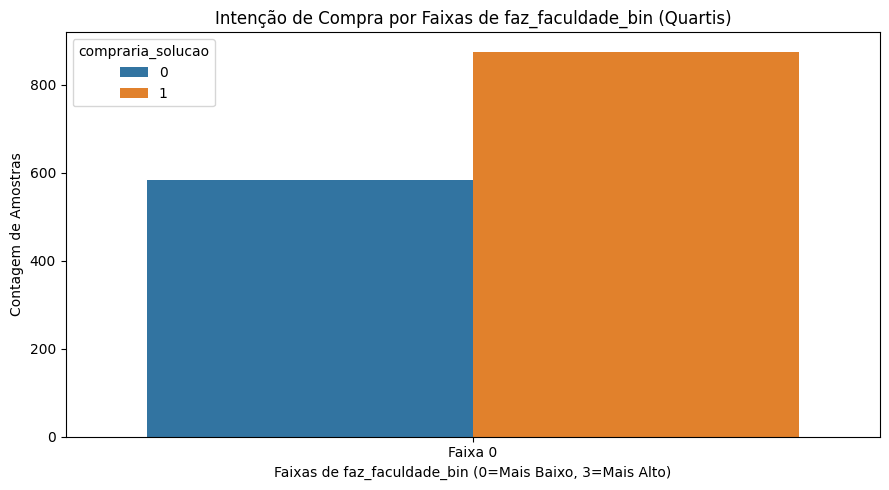

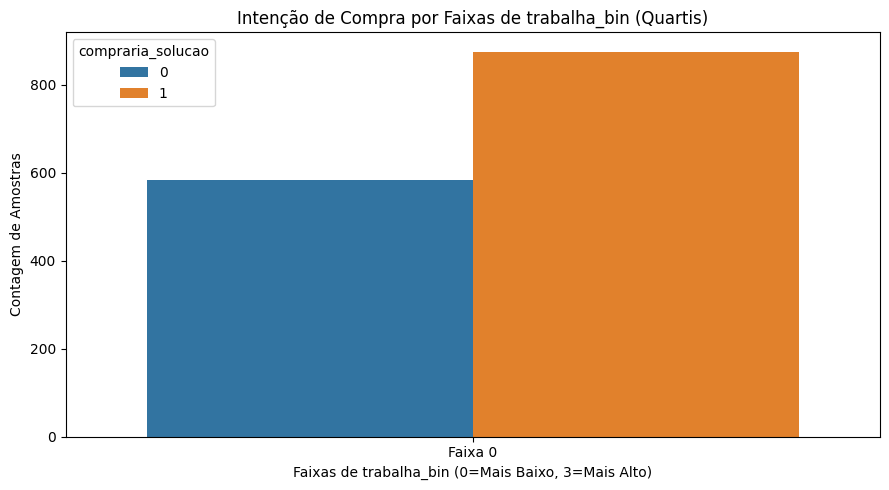

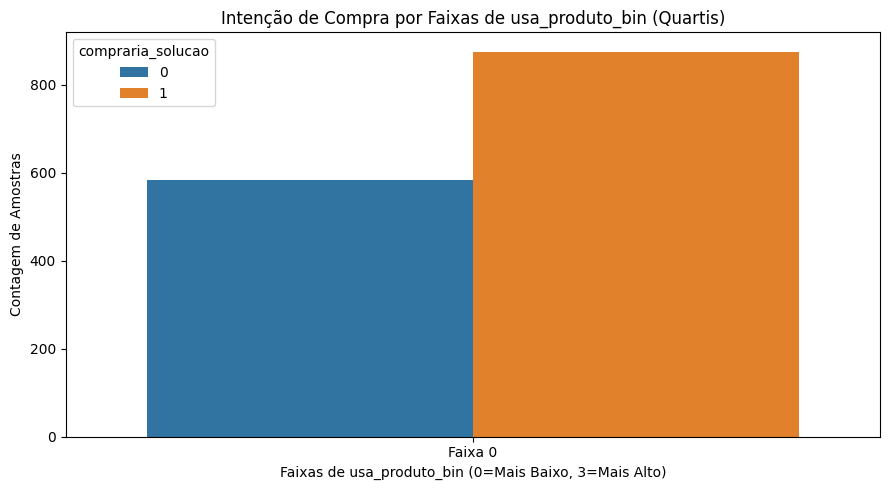

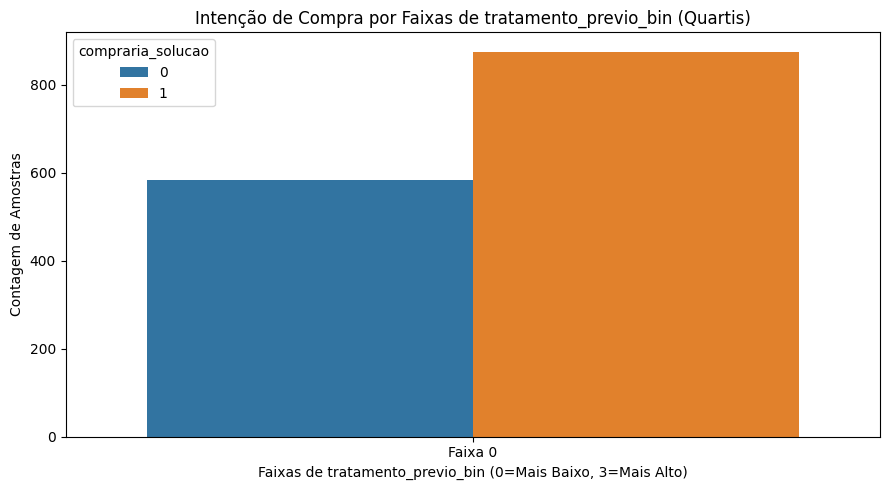

In [18]:
target_coluna = "compraria_solucao"

# Definir as colunas numéricas que queremos plotar.
tipos_numericos = ['int64', 'float64', 'int32', 'float32']

print("Gerando Count Plots para colunas numéricas (em 4 faixas) vs. Intenção de Compra...")

# Cria uma cópia temporária do DataFrame para as transformações
df_temp = df.copy()

# Itera sobre todas as colunas do DataFrame
for coluna in df.columns:
    # Ignorar a coluna alvo
    if coluna == target_coluna:
        continue

    # Verificar se a coluna é numérica
    if df[coluna].dtype not in tipos_numericos:
        continue

    # Etapa de Discretização (Criação de Faixas) ---
    try:
        # Usa pd.qcut para dividir a coluna numérica em 4 faixas (quartis)
        # O argumento `duplicates='drop'` evita erro se houver muitos valores repetidos
        df_temp[f'{coluna}_FAIXAS'] = pd.qcut(df_temp[coluna], q=4, labels=False, duplicates='drop')
    except ValueError as e:
        print(f"Aviso: Não foi possível discretizar a coluna '{coluna}' (erro: {e}). Usando pd.cut.")
        # Se qcut falhar, tenta pd.cut com faixas de largura igual
        df_temp[f'{coluna}_FAIXAS'] = pd.cut(df_temp[coluna], bins=4, labels=False, include_lowest=True)

    # Bloco de Plotagem (Count Plot) ---

    coluna_faixa = f'{coluna}_FAIXAS'

    # Define o tamanho da figura
    plt.figure(figsize=(9, 5))

    # Cria o Count Plot (Contagem)
    # x = A nova coluna de faixas discretas (0, 1, 2, 3)
    # hue = A variável alvo (0 ou 1)
    sns.countplot(data=df_temp, x=coluna_faixa, hue=target_coluna)

    # Define rótulos personalizados para as faixas
    labels = [f'Faixa {i}' for i in range(df_temp[coluna_faixa].nunique())]
    plt.xticks(ticks=range(len(labels)), labels=labels)

    # Adiciona título e rótulos
    plt.title(f"Intenção de Compra por Faixas de {coluna} (Quartis)")
    plt.xlabel(f"Faixas de {coluna} (0=Mais Baixo, 3=Mais Alto)")
    plt.ylabel("Contagem de Amostras")

    # Ajusta o layout
    plt.tight_layout()

    # Exibe o gráfico
    plt.show()

# Matriz de correlação

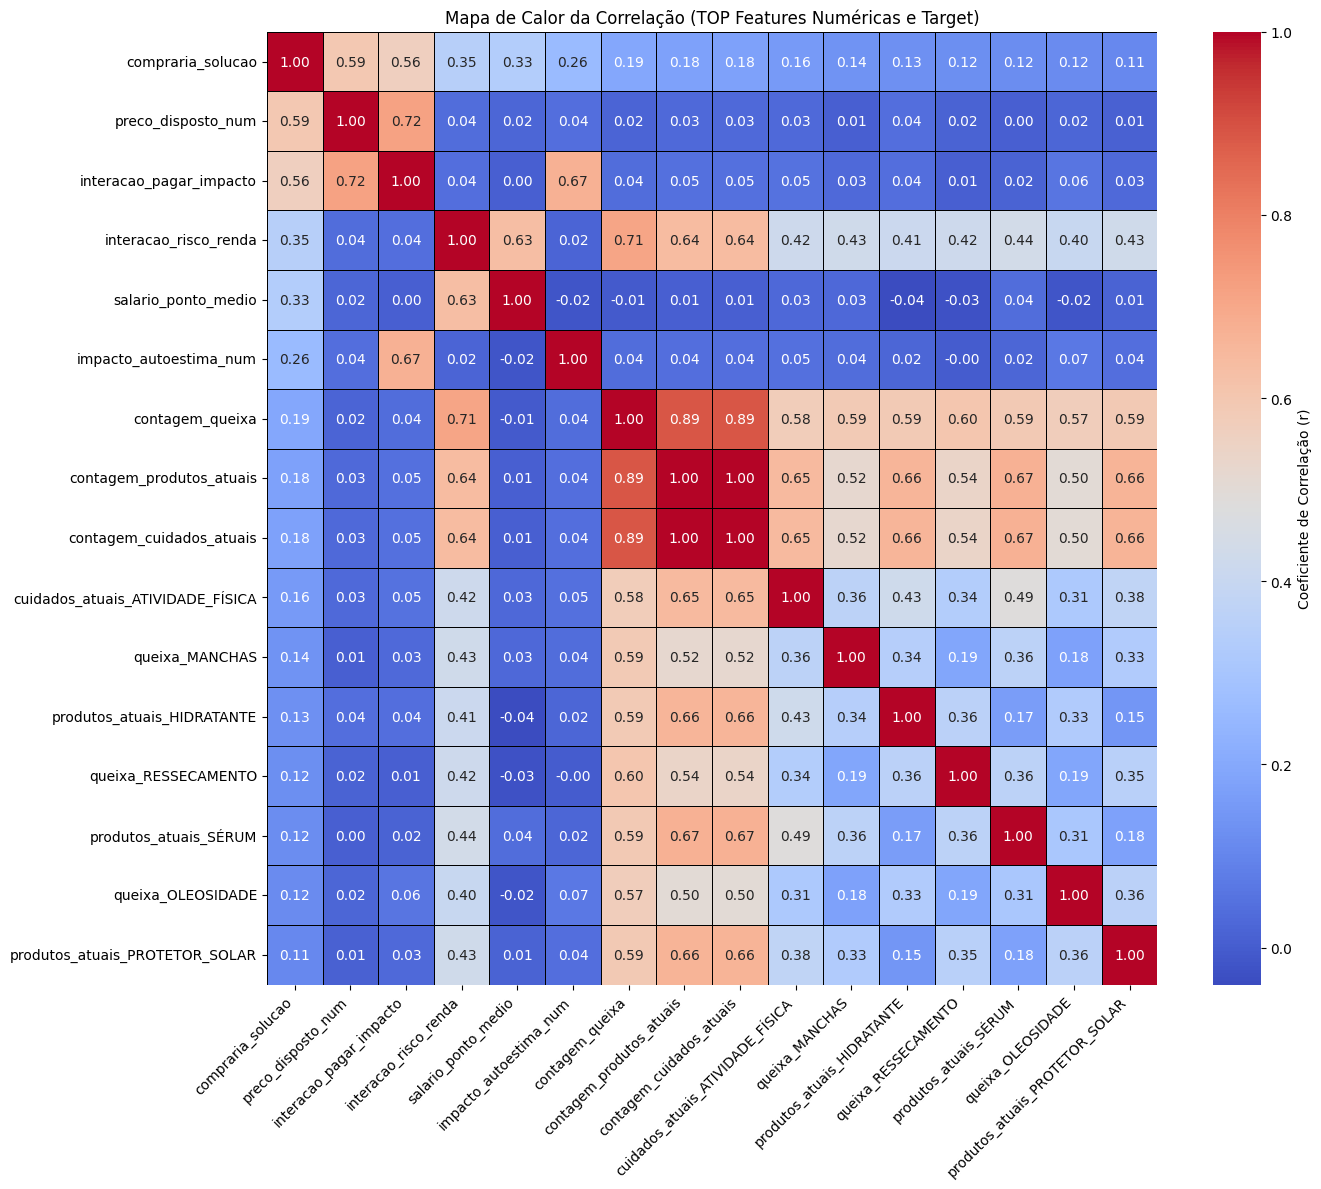


--- Correlação com a Intenção de Compra (compraria_solucao) ---
compraria_solucao                   1.000000
preco_disposto_num                  0.594144
interacao_pagar_impacto             0.563271
interacao_risco_renda               0.347160
salario_ponto_medio                 0.334280
impacto_autoestima_num              0.258299
contagem_queixa                     0.192204
contagem_produtos_atuais            0.178180
contagem_cuidados_atuais            0.178180
cuidados_atuais_ATIVIDADE_FÍSICA    0.156090
queixa_MANCHAS                      0.137563
produtos_atuais_HIDRATANTE          0.128028
queixa_RESSECAMENTO                 0.123058
produtos_atuais_SÉRUM               0.118386
queixa_OLEOSIDADE                   0.116307
produtos_atuais_PROTETOR_SOLAR      0.108786
cuidados_atuais_SKINCARE            0.106848
queixa_QUEDA_DE_CABELO              0.104695
cuidados_atuais_DIETA               0.092634
queixa_ACNE                         0.080301
Name: compraria_solucao, dtype: flo

In [19]:
target_coluna = "compraria_solucao"
tipos_numericos = ['int64', 'float64', 'int32', 'float32']

# Identificar todas as colunas numéricas
colunas_para_correlacao = [col for col in df.columns if df[col].dtype in tipos_numericos]

# Garantir que a coluna alvo esteja na lista
if target_coluna not in colunas_para_correlacao:
    colunas_para_correlacao.append(target_coluna)

# Limitar a análise às 20 colunas mais correlacionadas com o target
# Isso evita um heatmap ilegível se houver muitas colunas OHE.
# Calculamos a correlação e selecionamos as top 20 em valor absoluto.
corr_completa = df[colunas_para_correlacao].corr()
corr_target_abs = abs(corr_completa[target_coluna]).sort_values(ascending=False)

# Seleciona as TOP 15 features mais importantes + a target
top_features_corr = corr_target_abs.head(16).index
corr_matrix_subset = df[top_features_corr].corr()


# Bloco de Plotagem (Mapa de Calor) ---

plt.figure(figsize=(14, 12))
#
sns.heatmap(corr_matrix_subset,
            annot=True, # Mostrar os valores do coeficiente
            fmt=".2f", # Formato de duas casas decimais
            cmap='coolwarm', # Esquema de cores: vermelho para negativo, azul para positivo
            linewidths=.5, # Linhas para separar as células
            linecolor='black',
            cbar_kws={'label': 'Coeficiente de Correlação (r)'})
plt.title('Mapa de Calor da Correlação (TOP Features Numéricas e Target)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# --- Exibição da Correlação com o Target em Tabela ---
print("\n--- Correlação com a Intenção de Compra (compraria_solucao) ---")
print(corr_completa[target_coluna].sort_values(ascending=False).head(20))

# Separar em Treino e teste

In [20]:
# Separação de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"Conjunto de treino: {len(X_train)} amostras. Conjunto de teste: {len(X_test)} amostras.")


Conjunto de treino: 1095 amostras. Conjunto de teste: 365 amostras.


# Escalonamento de Variáveis Numéricas (StandardScaler)

In [21]:
scaler = StandardScaler()
# Lista completa de todas as features numéricas
num_cols = [
    'idade', 'impacto_autoestima_num', 'escolaridade_num', 'salario_ponto_medio',
    'preco_disposto_num', 'tempo_incomodo_meses', 'contagem_queixa',
    'contagem_produtos_atuais', 'contagem_cuidados_atuais',
    'interacao_pagar_impacto', 'interacao_engajamento_cronico', 'interacao_risco_renda'
]

# Garantir que o escalonamento seja aplicado apenas onde as colunas existem (caso o sintético tenha menos colunas)
cols_to_scale = [col for col in num_cols if col in X_train.columns]

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print("Variáveis numéricas escalonadas.")

Variáveis numéricas escalonadas.


# Aplicação do SMOTE para Balanceamento de Classes

In [22]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Dados balanceados (SMOTE). Novo tamanho do treino: {len(X_train_smote)}")

Dados balanceados (SMOTE). Novo tamanho do treino: 1314


# Treinamento e Avaliação dos Modelos Base

In [23]:
# --- Regressão Logística ---
lr_model = LogisticRegression(random_state=42, solver='liblinear', C=0.1)
lr_model.fit(X_train_smote, y_train_smote)
lr_pred = lr_model.predict(X_test)
print("\n--- Regressão Logística ---")
print(f"Acurácia: {accuracy_score(y_test, lr_pred):.4f}")
print("Relatório de Classificação:\n", classification_report(y_test, lr_pred, zero_division=0))

print("--" * 50 )

# --- Árvore de Decisão ---
dt_model = DecisionTreeClassifier(random_state=42, max_depth=8)
dt_model.fit(X_train_smote, y_train_smote)
dt_pred = dt_model.predict(X_test)
print("\n--- Árvore de Decisão ---")
print(f"Acurácia: {accuracy_score(y_test, dt_pred):.4f}")
print("Relatório de Classificação:\n", classification_report(y_test, dt_pred, zero_division=0))

print("--" * 50 )

# --- Random Forest Base ---
rf_base = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
rf_base.fit(X_train_smote, y_train_smote)
rf_pred_base = rf_base.predict(X_test)
print("\n--- Random Forest (Base) ---")
print(f"Acurácia: {accuracy_score(y_test, rf_pred_base):.4f}")
print("Relatório de Classificação:\n", classification_report(y_test, rf_pred_base, zero_division=0))


--- Regressão Logística ---
Acurácia: 0.8740
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       146
           1       0.89      0.90      0.90       219

    accuracy                           0.87       365
   macro avg       0.87      0.87      0.87       365
weighted avg       0.87      0.87      0.87       365

----------------------------------------------------------------------------------------------------

--- Árvore de Decisão ---
Acurácia: 0.8219
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       146
           1       0.83      0.88      0.86       219

    accuracy                           0.82       365
   macro avg       0.82      0.81      0.81       365
weighted avg       0.82      0.82      0.82       365

-------------------------------------------------------------------------------------------------

# Matriz confusão

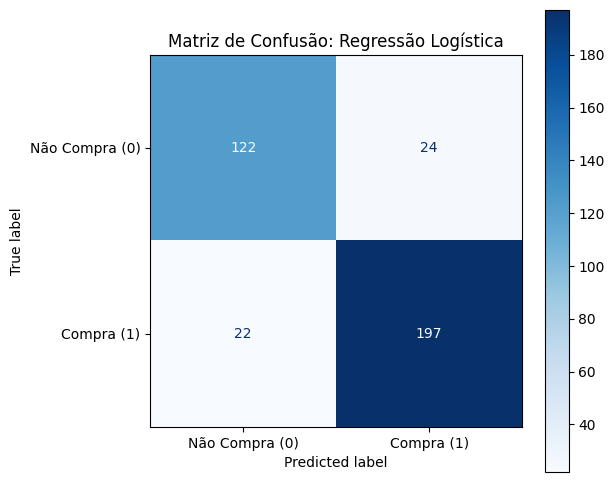

--- Regressão Logística ---
VP (Acertou 'Sim'): 197
FP (Errou, disse 'Sim' mas foi 'Não' - Custo): 24
FN (Errou, disse 'Não' mas foi 'Sim' - Oportunidade Perdida): 22
VN (Acertou 'Não'): 122



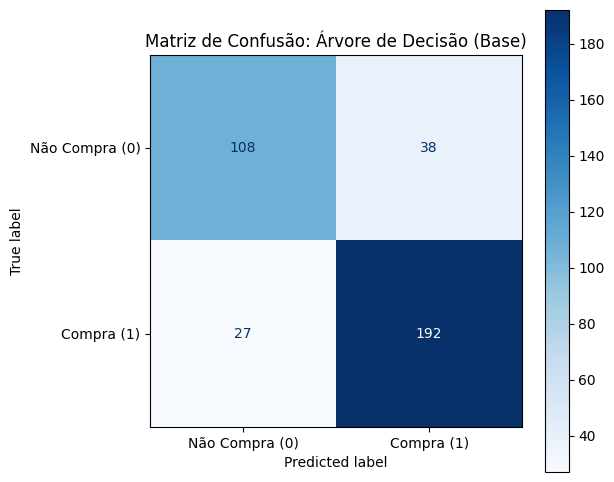

--- Árvore de Decisão (Base) ---
VP (Acertou 'Sim'): 192
FP (Errou, disse 'Sim' mas foi 'Não' - Custo): 38
FN (Errou, disse 'Não' mas foi 'Sim' - Oportunidade Perdida): 27
VN (Acertou 'Não'): 108



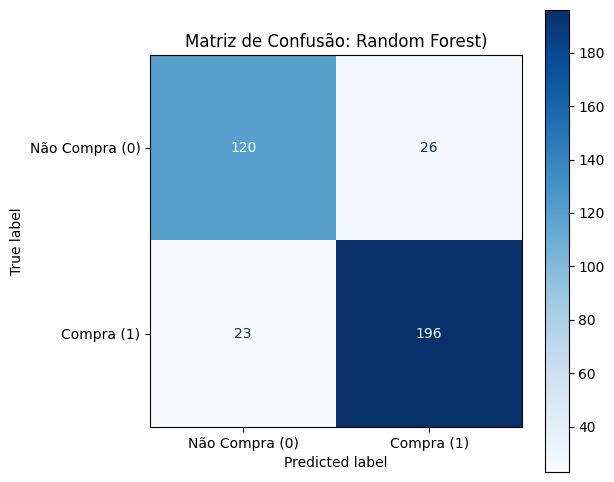

--- Random Forest) ---
VP (Acertou 'Sim'): 196
FP (Errou, disse 'Sim' mas foi 'Não' - Custo): 26
FN (Errou, disse 'Não' mas foi 'Sim' - Oportunidade Perdida): 23
VN (Acertou 'Não'): 120



In [24]:


# Garante que as previsões estejam disponíveis
modelos_e_previsoes = [
    ("Regressão Logística", lr_pred),
    ("Árvore de Decisão (Base)", dt_pred),
    ("Random Forest)", rf_pred_base)
]

# Itera sobre cada modelo e plota a Matriz de Confusão
for nome_modelo, previsoes in modelos_e_previsoes:

    # Calcular a Matriz de Confusão
    cm = confusion_matrix(y_test, previsoes)

    # Plotar a Matriz de Confusão
    plt.figure(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=['Não Compra (0)', 'Compra (1)']
    )

    #
    disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
    plt.title(f"Matriz de Confusão: {nome_modelo}")
    plt.show()

    # 3. Exibir Resumo das Métricas
    print(f"--- {nome_modelo} ---")
    VN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    VP = cm[1, 1]

    print(f"VP (Acertou 'Sim'): {VP}")
    print(f"FP (Errou, disse 'Sim' mas foi 'Não' - Custo): {FP}")
    print(f"FN (Errou, disse 'Não' mas foi 'Sim' - Oportunidade Perdida): {FN}")
    print(f"VN (Acertou 'Não'): {VN}\n")

In [25]:

print("--- Iniciando Otimização de Modelos com Grid Search (DT, RF, XGBoost) ---")
print("Atenção: Este processo pode levar alguns minutos, dependendo da máquina e do tamanho do dataset.")

# =================================================================
# 1. GRID SEARCH para Árvore de Decisão (Decision Tree)
# =================================================================

param_grid_dt = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

start_time_dt = time.time()
dt_grid.fit(X_train_smote, y_train_smote)
end_time_dt = time.time()

dt_best_model = dt_grid.best_estimator_
dt_pred_gs = dt_best_model.predict(X_test)


print("\n--- Resultados da Árvore de Decisão Otimizada ---")
print(f"Tempo de Treinamento: {end_time_dt - start_time_dt:.2f} segundos")
print(f"Melhores Parâmetros: {dt_grid.best_params_}")
print(f"Acurácia no Teste: {accuracy_score(y_test, dt_pred_gs):.4f}")
print("Relatório de Classificação:\n", classification_report(y_test, dt_pred_gs, zero_division=0))


# =================================================================
# 2. GRID SEARCH para Random Forest
# =================================================================

param_grid_rf = {
    'n_estimators': [200, 400],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10]
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

start_time_rf = time.time()
rf_grid.fit(X_train_smote, y_train_smote)
end_time_rf = time.time()

rf_best_model = rf_grid.best_estimator_
rf_pred_gs = rf_best_model.predict(X_test)


print("\n--- Resultados do Random Forest Otimizado ---")
print(f"Tempo de Treinamento: {end_time_rf - start_time_rf:.2f} segundos")
print(f"Melhores Parâmetros: {rf_grid.best_params_}")
print(f"Acurácia no Teste: {accuracy_score(y_test, rf_pred_gs):.4f}")
print("Relatório de Classificação:\n", classification_report(y_test, rf_pred_gs, zero_division=0))


# =================================================================
# 3. GRID SEARCH para XGBoost (Otimização Fina)
# =================================================================

# Otimização mais focada para o XGBoost, que é naturalmente mais lento
param_grid_xgb = {
    'n_estimators': [200, 500],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

xgb_grid = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid_xgb,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

start_time_xgb = time.time()
xgb_grid.fit(X_train_smote, y_train_smote)
end_time_xgb = time.time()

xgb_best_model = xgb_grid.best_estimator_
xgb_pred_gs = xgb_best_model.predict(X_test)


print("\n--- Resultados do XGBoost Otimizado ---")
print(f"Tempo de Treinamento: {end_time_xgb - start_time_xgb:.2f} segundos")
print(f"Melhores Parâmetros: {xgb_grid.best_params_}")
print(f"Acurácia no Teste: {accuracy_score(y_test, xgb_pred_gs):.4f}")
print("Relatório de Classificação:\n", classification_report(y_test, xgb_pred_gs, zero_division=0))

--- Iniciando Otimização de Modelos com Grid Search (DT, RF, XGBoost) ---
Atenção: Este processo pode levar alguns minutos, dependendo da máquina e do tamanho do dataset.
Fitting 3 folds for each of 12 candidates, totalling 36 fits

--- Resultados da Árvore de Decisão Otimizada ---
Tempo de Treinamento: 3.63 segundos
Melhores Parâmetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Acurácia no Teste: 0.8356
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       146
           1       0.87      0.85      0.86       219

    accuracy                           0.84       365
   macro avg       0.83      0.83      0.83       365
weighted avg       0.84      0.84      0.84       365

Fitting 3 folds for each of 8 candidates, totalling 24 fits

--- Resultados do Random Forest Otimizado ---
Tempo de Treinamento: 19.29 segundos
Melhores Parâmetros: {'max_depth': 20, 'min_samples_split': 5, 'n_es

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:05:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# COMPARATIVO DOS MODELOS

In [26]:
print("\n--- Resultados da Árvore de Decisão Otimizada ---")
print(f"Tempo de Treinamento: {end_time_dt - start_time_dt:.2f} segundos")
print(f"Melhores Parâmetros: {dt_grid.best_params_}")
print(f"Acurácia no Teste: {accuracy_score(y_test, dt_pred_gs):.4f}")
print("Relatório de Classificação:\n", classification_report(y_test, dt_pred_gs, zero_division=0))

print("--" * 50)

print("\n--- Random Forest (Grid Search) ---")
print(f"Melhores Parâmetros RF: {rf_grid.best_params_}")
print(f"Acurácia RF Otimizado: {accuracy_score(y_test, rf_pred_gs):.4f}")
print("Relatório de Classificação RF Otimizado:\n", classification_report(y_test, rf_pred_gs, zero_division=0))

print("--" * 50)


print("\n--- XGBoost (Boosting) ---")
print(f"Acurácia XGBoost: {accuracy_score(y_test, xgb_pred_gs):.4f}")
print("Relatório de Classificação XGBoost:\n", classification_report(y_test, xgb_pred_gs, zero_division=0))


--- Resultados da Árvore de Decisão Otimizada ---
Tempo de Treinamento: 3.63 segundos
Melhores Parâmetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Acurácia no Teste: 0.8356
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       146
           1       0.87      0.85      0.86       219

    accuracy                           0.84       365
   macro avg       0.83      0.83      0.83       365
weighted avg       0.84      0.84      0.84       365

----------------------------------------------------------------------------------------------------

--- Random Forest (Grid Search) ---
Melhores Parâmetros RF: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 400}
Acurácia RF Otimizado: 0.8685
Relatório de Classificação RF Otimizado:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       146
           1       0.87      0.92     

# Matriz Confusão do modelo com melhor resultado

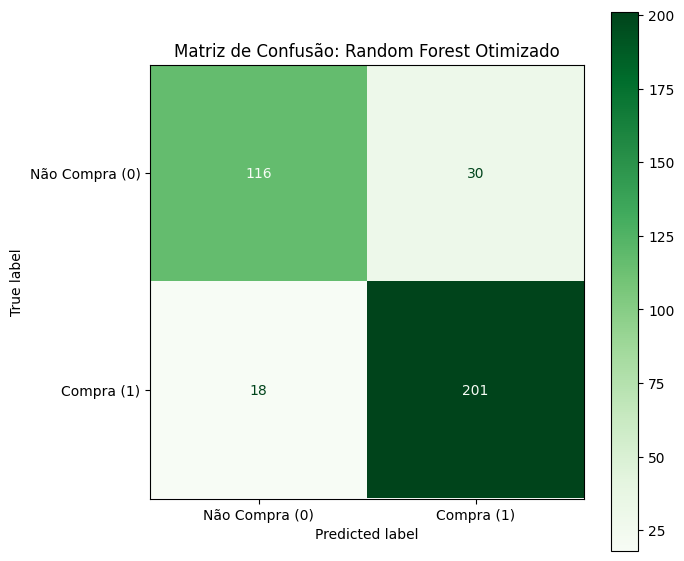


--- Análise de Erros (Random Forest) ---
Total de Erros Tipo I (Falso Positivo - Custo): 30
Total de Erros Tipo II (Falso Negativo - Oportunidade Perdida): 18
----------------------------------------------------------------------------------------------------
Metricas do modelo

--- Random Forest (Grid Search) ---
Acurácia RF Otimizado: 0.8685
Relatório de Classificação RF Otimizado:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       146
           1       0.87      0.92      0.89       219

    accuracy                           0.87       365
   macro avg       0.87      0.86      0.86       365
weighted avg       0.87      0.87      0.87       365

----------------------------------------------------------------------------------------------------


In [27]:


# Usamos as previsões do Random Forest Otimizado
cm = confusion_matrix(y_test, rf_pred_gs)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Não Compra (0)', 'Compra (1)']
)

plt.figure(figsize=(7, 7))
disp.plot(cmap=plt.cm.Greens, values_format='d', ax=plt.gca())
plt.title("Matriz de Confusão: Random Forest Otimizado")
plt.show()

print("\n--- Análise de Erros (Random Forest) ---")
FP = cm[0, 1]  # Falso Positivo (Custo)
FN = cm[1, 0]  # Falso Negativo (Oportunidade Perdida)
print(f"Total de Erros Tipo I (Falso Positivo - Custo): {FP}")
print(f"Total de Erros Tipo II (Falso Negativo - Oportunidade Perdida): {FN}")

print("--" * 50)

print(f"Metricas do modelo")

print("\n--- Random Forest (Grid Search) ---")
print(f"Acurácia RF Otimizado: {accuracy_score(y_test, rf_pred_gs):.4f}")
print("Relatório de Classificação RF Otimizado:\n", classification_report(y_test, rf_pred_gs, zero_division=0))

print("--" * 50)

In [28]:
import joblib

# Salvamento do modelo vencedor
joblib.dump(rf_best_model, 'random_forest_vencedor.pkl')
print("✅ Modelo Random Forest Otimizado salvo como: random_forest_vencedor.pkl")

# Salvamento do objeto scaler
joblib.dump(scaler, 'scaler_final.pkl')
print("✅ Objeto StandardScaler salvo como: scaler_final.pkl")

✅ Modelo Random Forest Otimizado salvo como: random_forest_vencedor.pkl
✅ Objeto StandardScaler salvo como: scaler_final.pkl
